In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.datasets import load_iris
from sklearn import preprocessing

---
#Decision Tree Decision Boundary and Explanatory Graph
---

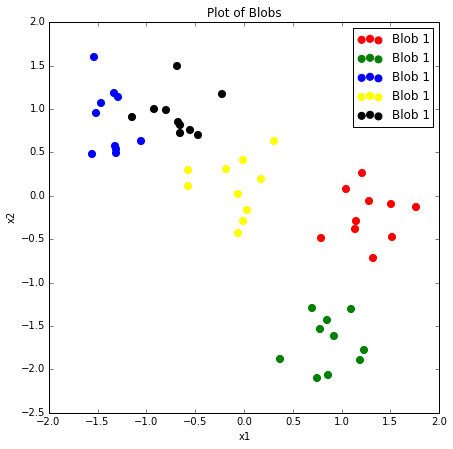

In [5]:
#number of training examples
m = 50

#number of features
N = 2

#number of distinct clusters or groupings or 'blobs'
num_blobs = 5

#using sklearn's 'make_blobs' functionality to make some clusters of data
#blobs also returns an array, y, which contains the identity of the blob each pair of points belongs to
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=1.5, random_state=6)

#you MUST scale your data
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
X_scaled = scaler.transform(X)

color_list = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'magenta', 'cyan']

#Plot the blobs and color them for each blob
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
for i in xrange(num_blobs):
    ax.scatter(X_scaled[y == i,0], X_scaled[y == i,1], color=color_list[i], s=50, label='Blob 1')
ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='best')

In [6]:
clfTree = DecisionTreeClassifier()
clfTree.fit(X_scaled, y)

cm = pd.crosstab(y, clfTree.predict(X_scaled), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1,2,3,4
Actual,,,,,
0,10,0,0,0,0
1,0,10,0,0,0
2,0,0,10,0,0
3,0,0,0,10,0
4,0,0,0,0,10


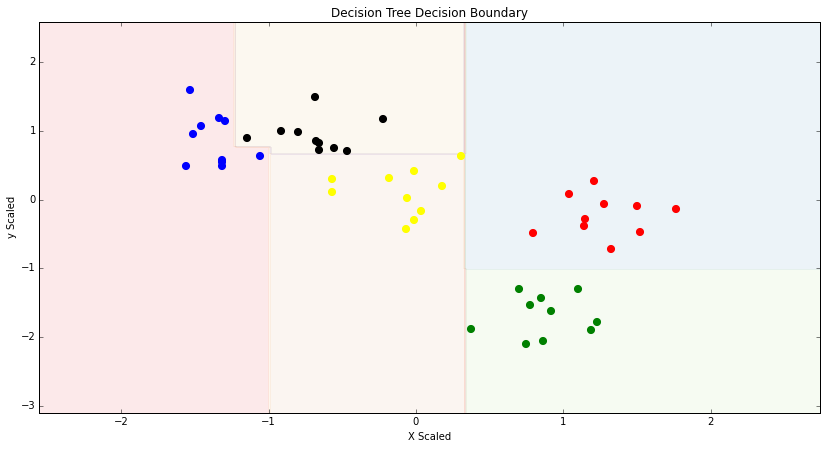

In [7]:
fig = plt.figure(figsize = (14, 7))
ax = plt.subplot(111)

#find the limits required for the plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

#step size for the mesh
step_size = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

#predict over the mesh
Z = clfTree.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)

#re-plot the points
for i in xrange(num_blobs):
    ax.scatter(X_scaled[y == i,0], X_scaled[y == i,1], color=color_list[i], s=50)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Decision Tree Decision Boundary")
ax.set_xlabel("X Scaled")
ax.set_ylabel("y Scaled")

In [8]:
with open("blobs_tree.dot", "w") as f:
    f = export_graphviz(clfTree, out_file = f)

In [9]:
!dot -Tpdf blobs_tree.dot -o blobs.pdf

Aug  4 22:53:02 CIBIGMAC.local dot[81364] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
Aug  4 22:53:02 CIBIGMAC.local dot[81364] <Error>: The function ‘CGFontGetGlyphPaths’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.


In [10]:
!ls

Assets
DEMO-Decision_Tree-Decision_Boundary.ipynb
DecisionTreeEquationsandstuff.ipynb
Ensemble_Decision_Boundary.ipynb
Ensemble_Demo-Copy1.ipynb
Ensemble_Demo.ipynb
Ensemble_Methods.key
Ensemble_Methods.pdf
MNIST.ipynb
README.md
blobs.pdf
blobs_tree.dot
iris_tree.pdf


---
##Repeat with something a little more meaningful - The Iris Dataset
---

In [11]:
iris = load_iris()
X = iris.data
y = iris.target
clfTI = DecisionTreeClassifier(criterion = 'entropy')
clfTI.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [12]:
cm = pd.crosstab(y, clfTI.predict(X), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,50,0
2,0,0,50


#####Produce the pdf of the tree

In [13]:
with open("iris_tree.dot", "w") as f:
    f = export_graphviz(clfTI, out_file = f)

In [14]:
!dot -Tpdf iris_tree.dot -o iris_tree.pdf

Aug  4 22:53:12 CIBIGMAC.local dot[81367] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
Aug  4 22:53:12 CIBIGMAC.local dot[81367] <Error>: The function ‘CGFontGetGlyphPaths’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.


---
####Let's confirm the finding that the 3rd feature will classify the first class, simply by being < 2.45

In [15]:
print X.shape
Xa = X[:, 2]
print Xa.shape
Xb = Xa[:] < 2.45
print y[Xb]
print len(y[Xb])

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
50


In [42]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    